In [154]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import yfinance as yf

%matplotlib inline

In [25]:
#declaring


In [26]:
mkt2010=pd.read_csv('Resources/market_history_2010.csv', infer_datetime_format=True, parse_dates=True)
mkt2011=pd.read_csv('Resources/market_history_2011.csv', infer_datetime_format=True, parse_dates=True)
mkt2012=pd.read_csv('Resources/market_history_2012.csv', infer_datetime_format=True, parse_dates=True)
mkt2013=pd.read_csv('Resources/market_history_2013.csv', infer_datetime_format=True, parse_dates=True)
mkt2014=pd.read_csv('Resources/market_history_2014.csv', infer_datetime_format=True, parse_dates=True)
mkt2015=pd.read_csv('Resources/market_history_2015.csv', infer_datetime_format=True, parse_dates=True)
mkt2016=pd.read_csv('Resources/market_history_2016.csv', infer_datetime_format=True, parse_dates=True)
mkt2017=pd.read_csv('Resources/market_history_2017.csv', infer_datetime_format=True, parse_dates=True)
mkt2018=pd.read_csv('Resources/market_history_2018.csv', infer_datetime_format=True, parse_dates=True)
mkt2019=pd.read_csv('Resources/market_history_2019.csv', infer_datetime_format=True, parse_dates=True)
mkt2020=pd.read_csv('Resources/market_history_2020.csv', infer_datetime_format=True, parse_dates=True)

In [27]:
mkt2010_df=mkt2010.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2011_df=mkt2011.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2012_df=mkt2012.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2013_df=mkt2013.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2014_df=mkt2014.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2015_df=mkt2015.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2016_df=mkt2016.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2017_df=mkt2017.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2018_df=mkt2018.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2019_df=mkt2019.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 
mkt2020_df=mkt2020.drop(['Tape A Shares','Tape B Shares','Tape C Shares','Tape A Notional','Tape B Notional','Tape C Notional','Tape A Trade Count','Tape B Trade Count','Tape C Trade Count'], axis = 1) 


In [28]:
combined_MKT=pd.concat([mkt2010_df,mkt2011_df,mkt2012_df,mkt2013_df,mkt2014_df,mkt2015_df,mkt2016_df,mkt2017_df,mkt2018_df,mkt2019_df,mkt2020_df], axis='rows',join='inner')

In [29]:
combined_MKT.head(3)

,Day,Market Participant,Total Shares,Total Notional,Total Trade Count
0,2010-12-31,AMEX (A),25083128.0,4.231774e+08,96923
1,2010-12-31,BEX (B),96986204.0,2.496656e+09,517244
2,2010-12-31,NSX (C),28307821.0,6.299394e+08,106939


In [30]:
#MKT_part=combined_MKT.groupby('Market Participant').sum()

In [192]:
MKT_part=combined_MKT.sort_values(by='Market Participant')

In [193]:
MKT_part.head()

,Day,Market Participant,Total Shares,Total Notional,Total Trade Count
1628,2014-07-17,ADF (D),60967215.0,2.241300e+09,287284
1992,2014-06-10,ADF (D),53951601.0,1.713916e+09,250348
2006,2014-06-09,ADF (D),54126311.0,1.846032e+09,255333
2020,2014-06-06,ADF (D),53847554.0,1.867987e+09,246091
2034,2014-06-05,ADF (D),64442278.0,2.043151e+09,279310


In [194]:
#set an index by dates
MKT_part.set_index(['Day'], drop=True, inplace=True)

In [195]:
#Convert to daily dates
MKT_part.index = pd.DatetimeIndex(data=MKT_part.index)

#Convert to strings
MKT_part.index = MKT_part.index.strftime('%Y')

In [196]:
MKT_part=MKT_part.reset_index()

In [197]:
l=MKT_part.groupby('index').mean()

In [198]:
l.head(11)

,Total Shares,Total Notional,Total Trade Count
index,,,
2010,6.467700e+08,1.790559e+10,2.200361e+06
2011,5.224491e+08,1.687428e+10,2.024464e+06
2012,4.291572e+08,1.405358e+10,1.646727e+06
2013,4.124949e+08,1.484449e+10,1.574760e+06
2014,4.385449e+08,1.776094e+10,2.054305e+06
2015,5.275008e+08,2.122905e+10,2.484919e+06
2016,5.113018e+08,1.898606e+10,2.414847e+06
2017,4.635999e+08,1.925830e+10,2.186118e+06
2018,5.007555e+08,2.444136e+10,2.500623e+06


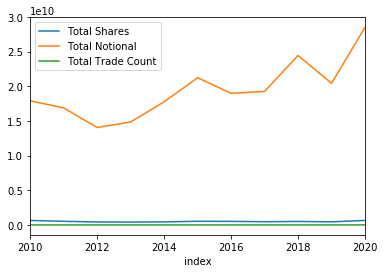

In [199]:
l.plot() #basic plotting

In [140]:
stock_volumes=pd.read_csv('Resources/market-volumes2.csv', infer_datetime_format=True, parse_dates=True,index_col='Date')

In [141]:
stock_volumes.head()

,Google,Apple,Amazon,Costco,Walmart,American_airline,McDonald,Wells_Fargo
Date,,,,,,,,
2010-01-04 16:00:00,1957963,17633150,7600543,3280136,20753890,17446532.0,5839235,39338100
2010-01-05 16:00:00,3007857,21496572,8856456,2775802,15649378,24046796.0,7098999,55418928
2010-01-06 16:00:00,3980628,19719942,7180977,3722838,12517828,15770835.0,10551872,33239586
2010-01-07 16:00:00,6418020,17040332,11030124,4527524,10662697,17664004.0,7517657,61648944
2010-01-08 16:00:00,4724735,15995583,9833829,2348272,11363488,12414826.0,6107296,35512360


In [142]:
#set an index by dates
#stock_volumes=stock_volumes.set_index(['Date'])


In [143]:
#stock_volumes.head()

In [161]:
#Convert to daily dates
stock_volumes.index = pd.DatetimeIndex(data=stock_volumes.index)
#Convert to strings
stock_volumes['Year'] = stock_volumes.index.strftime('%Y')

grouped_s_v=stock_volumes.groupby('Year').mean()

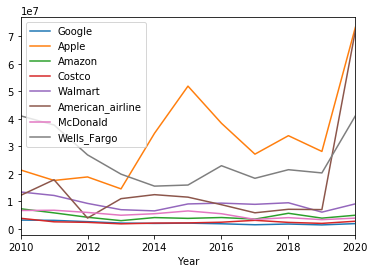

In [162]:
grouped_s_v.plot() #basic plotting

In [200]:
#2015 had an etraordinary outlook, we investigate the occurence of 2015
grouped_s_v['Google'][5]

2068262.9365079366

In [180]:
#average of previous years
grouped_s_v['Google'][:9].mean()

2226267.779604081

In [173]:
#2019 a year before
grouped_s_v['Google'][9]

1419116.5357142857

In [171]:
grouped_s_v['Google'][10]

1893451.0912698412

In [186]:
#2015 had an etraordinary outlook, we investigate the occurence of 2015
grouped_s_v['Apple'][:9].mean()

28695623.4047345

In [188]:
grouped_s_v['Apple'][5]

51858815.28571428

In [201]:
grouped_s_v['Apple'][9]

28125956.793650795

In [187]:
grouped_s_v['Apple'][10]

73259118.62698413

In [202]:
#2015 had an etraordinary outlook, we investigate the occurence of 2015
grouped_s_v['Amazon'][:9].mean()

4601615.917041759

In [203]:
grouped_s_v['Amazon'][5]

3798647.626984127

In [204]:
grouped_s_v['Amazon'][9]

3880833.4444444445

In [205]:
grouped_s_v['Amazon'][10]

4940731.726190476

In [59]:
k=grouped_s_v.reset_index()
gten=k['Google'][:9].mean()
gteny=(k['Apple'][9]).sum()

In [60]:
#covar=gten.cov(gteny)
gteny.dtype()

TypeError: 'numpy.dtype' object is not callable

In [216]:
aapl_holding=pd.read_csv('Resources/AAPL.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
amazon_holding=pd.read_csv('Resources/AMZN.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
birkshireA_holding=pd.read_csv('Resources/BRK.A.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
birkshireB_holding=pd.read_csv('Resources/BRK.B.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
costco_holding=pd.read_csv('Resources/COST.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
goldman_sachs_holding=pd.read_csv('Resources/GOLD.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
fb_holding=pd.read_csv('Resources/FB.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')
google_holding=pd.read_csv('Resources/GOOGL.csv',infer_datetime_format=True, parse_dates=True,index_col='Date')

In [217]:
#Convert to daily dates
aapl_holding.index = pd.DatetimeIndex(data=aapl_holding.index)
#Convert to strings
aapl_holding['Year'] = aapl_holding.index.strftime('%Y')

grouped_aapl=aapl_holding.groupby('Year').mean()

In [218]:
grouped_aapl

,apple_holding
Year,
2018,171757.215921
2019,220949.151447
2020,233785.542431


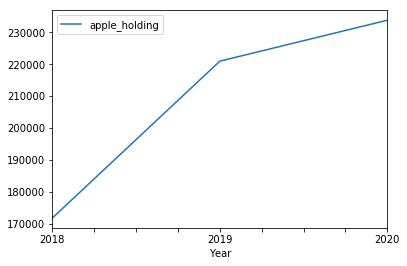

In [219]:
grouped_aapl.plot()

In [220]:
#implementing yahoo api

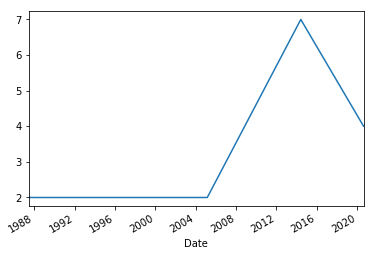

In [230]:
aapl_yf = yf.Ticker("aapl")

# get stock info
#aapl_yf.info()
aapl_split=aapl_yf.get_splits(proxy=None)
aapl_split.plot()

In [233]:
cost_yf = yf.Ticker("cost")

# get stock info
#aapl_yf.info()
cost_split=cost_yf.get_splits(proxy=None)
cost_split.head()

Date
1993-10-22    2.0
2000-01-14    2.0
Name: Stock Splits, dtype: float64

In [243]:
tsla_yf = yf.Ticker("tsla")

# get stock info
#aapl_yf.info()
tsla_split=tsla_yf.get_splits(proxy=None)
tsla_split.head()

Date
2020-08-31    5.0
Name: Stock Splits, dtype: float64

In [223]:
#Convert to daily dates
amazon_holding.index = pd.DatetimeIndex(data=amazon_holding.index)
#Convert to strings
amazon_holding['Year'] = amazon_holding.index.strftime('%Y')

grouped_amazon=amazon_holding.groupby('Year').mean()

In [224]:
grouped_amazon

,Amazon_holding
Year,
2018,96164.587593
2019,116794.245017
2020,110255.820483


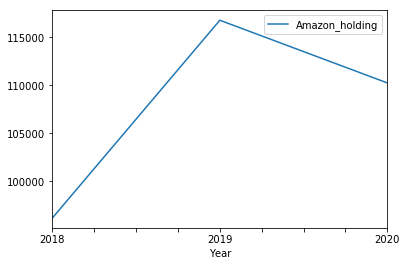

In [225]:
grouped_amazon.plot()

In [226]:
#Convert to daily dates
costco_holding.index = pd.DatetimeIndex(data=costco_holding.index)
#Convert to strings
costco_holding['Year'] = costco_holding.index.strftime('%Y')

grouped_costco=costco_holding.groupby('Year').mean()

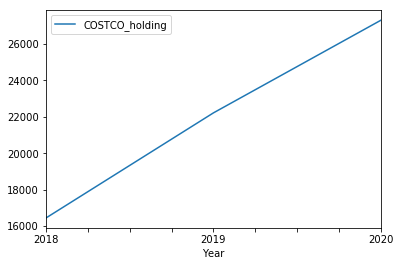

In [227]:
grouped_costco.plot()

In [228]:
#Convert to daily dates
goldman_sachs_holding.index = pd.DatetimeIndex(data=goldman_sachs_holding.index)
#Convert to strings
goldman_sachs_holding['Year'] = goldman_sachs_holding.index.strftime('%Y')

grouped_gold=goldman_sachs_holding.groupby('Year').mean()

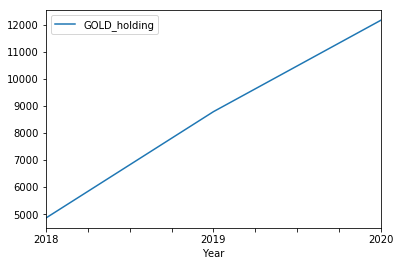

In [229]:
grouped_gold.plot()